In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from datetime import datetime
import re

from sklearn import metrics

In [2]:
os.chdir('../Data')

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [4]:
data_dictionary=pd.read_csv('./data_dictionary.csv')
data_dictionary

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


In [5]:
df=pd.read_csv('./train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [6]:
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [7]:
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [8]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [9]:
import missingno

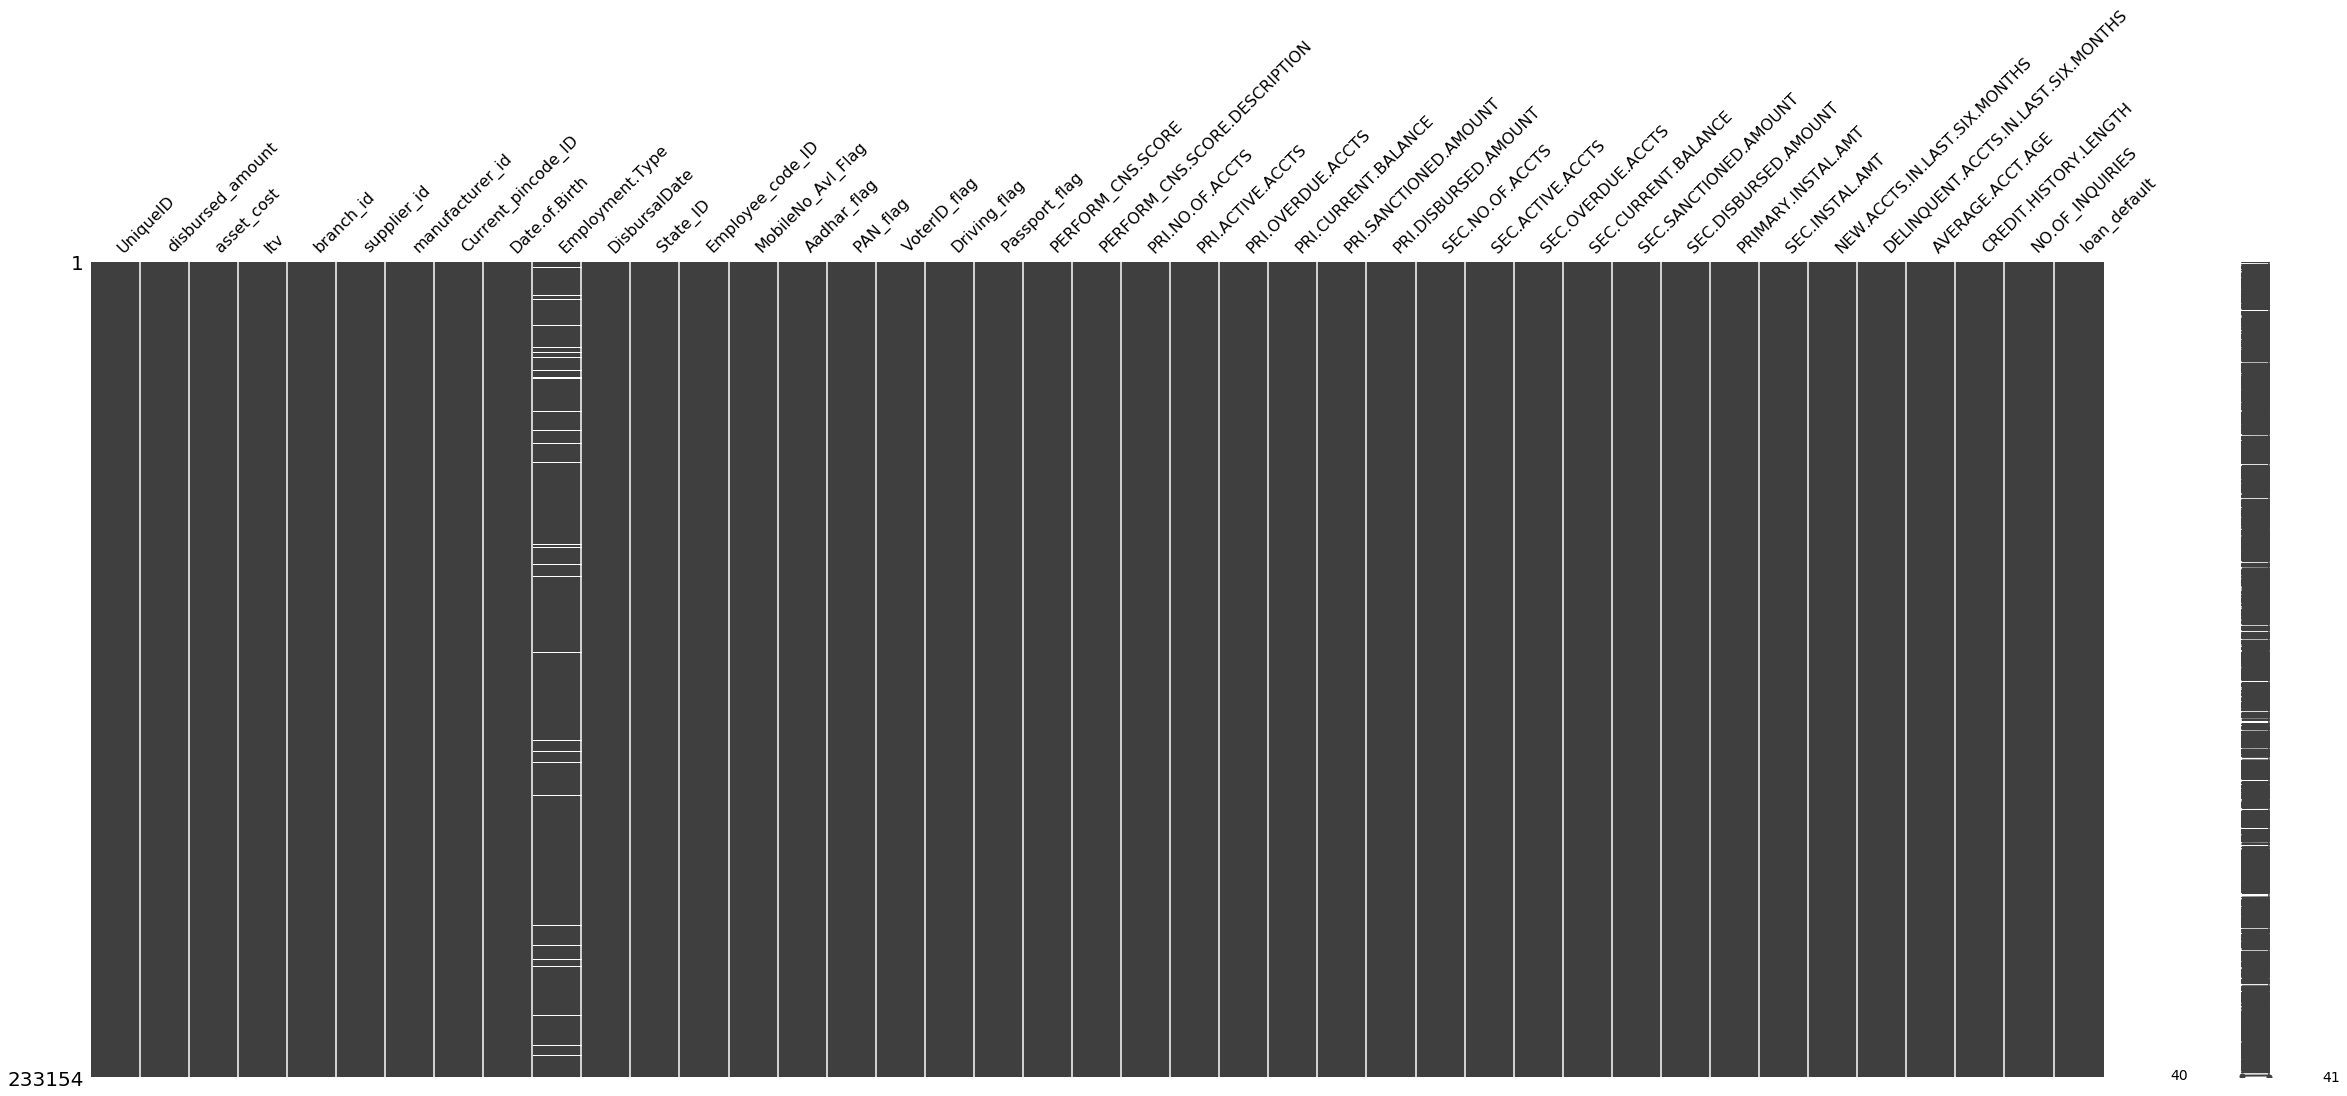

In [10]:
missingno.matrix(df,figsize=(40,15))

In [11]:
df.shape

(233154, 41)

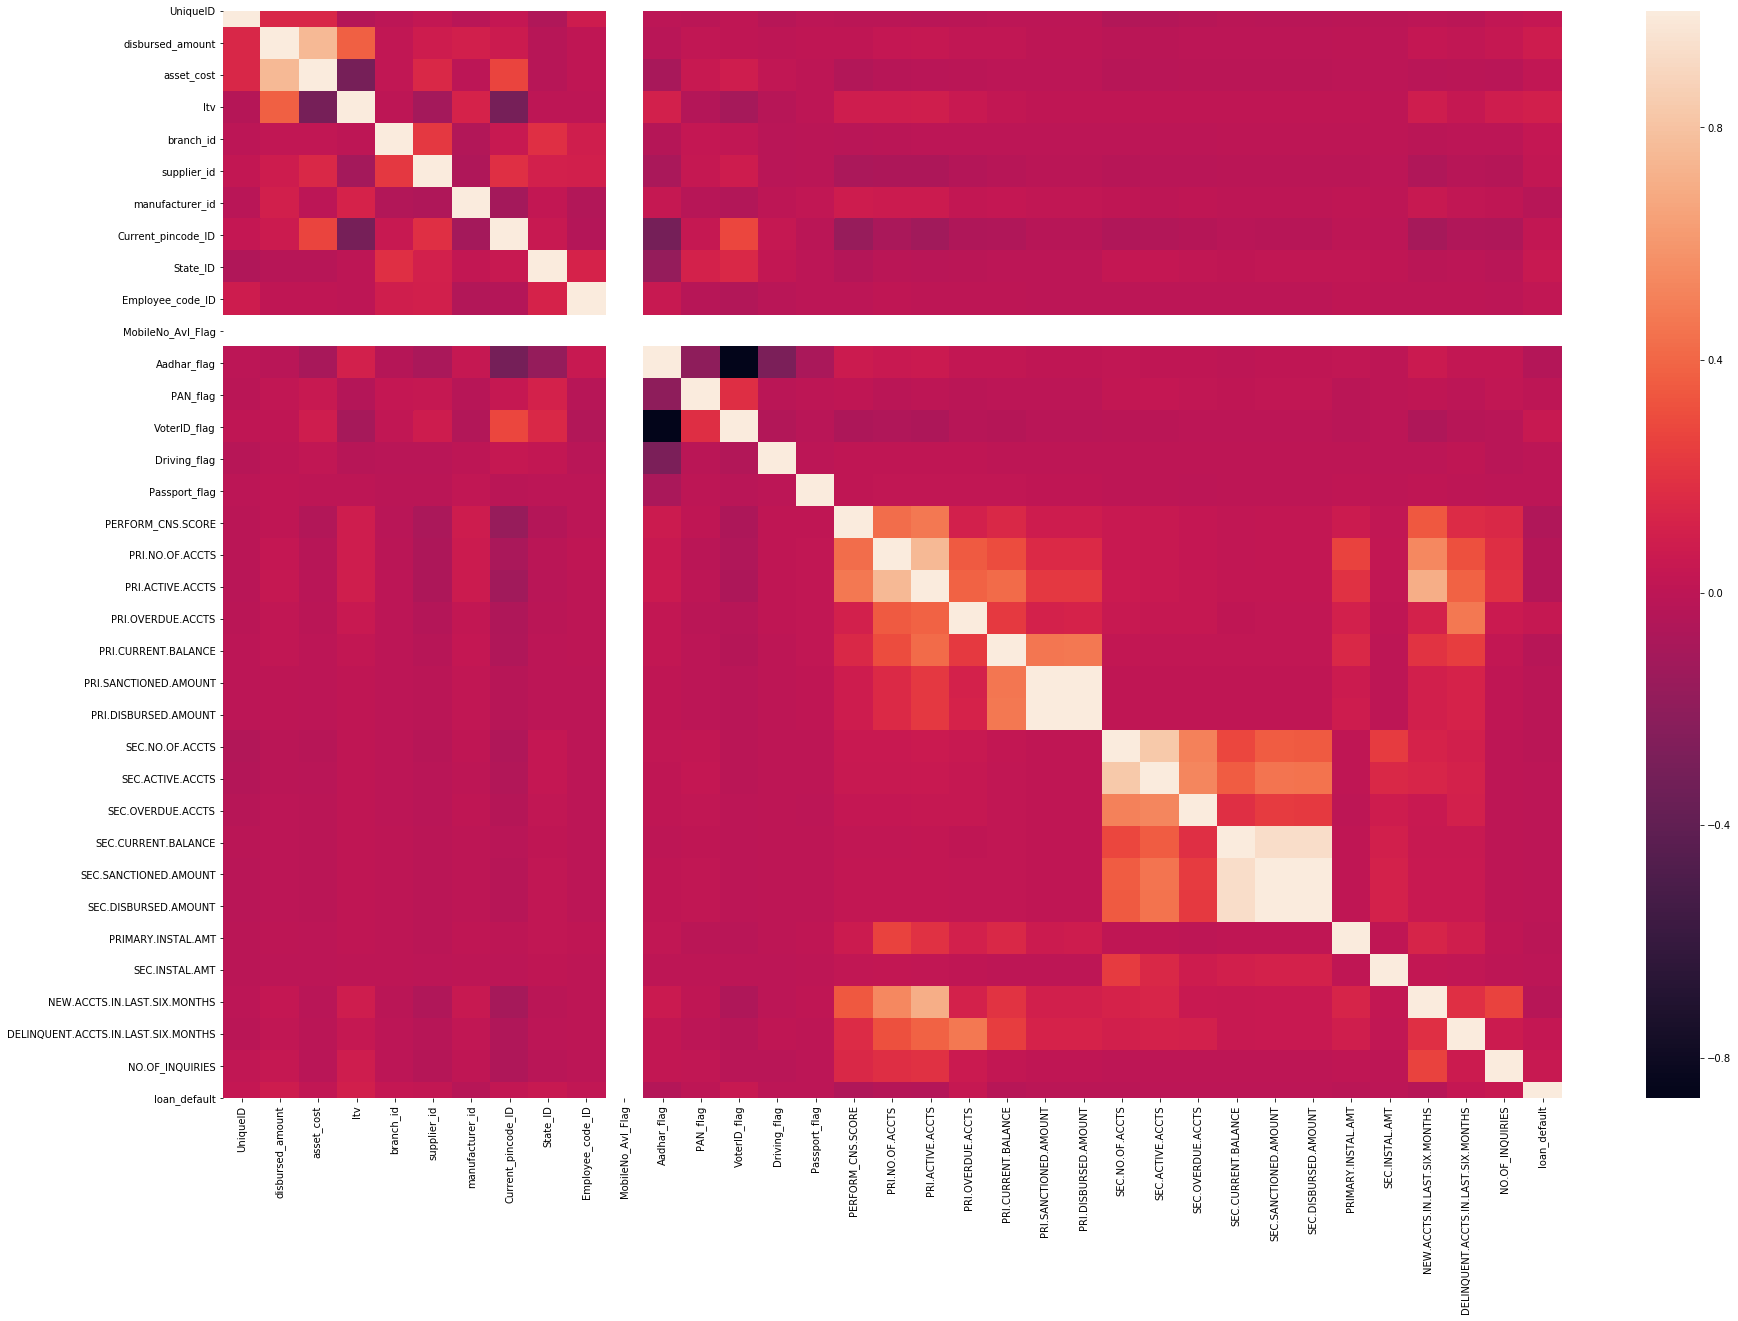

In [12]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr())
plt.show()

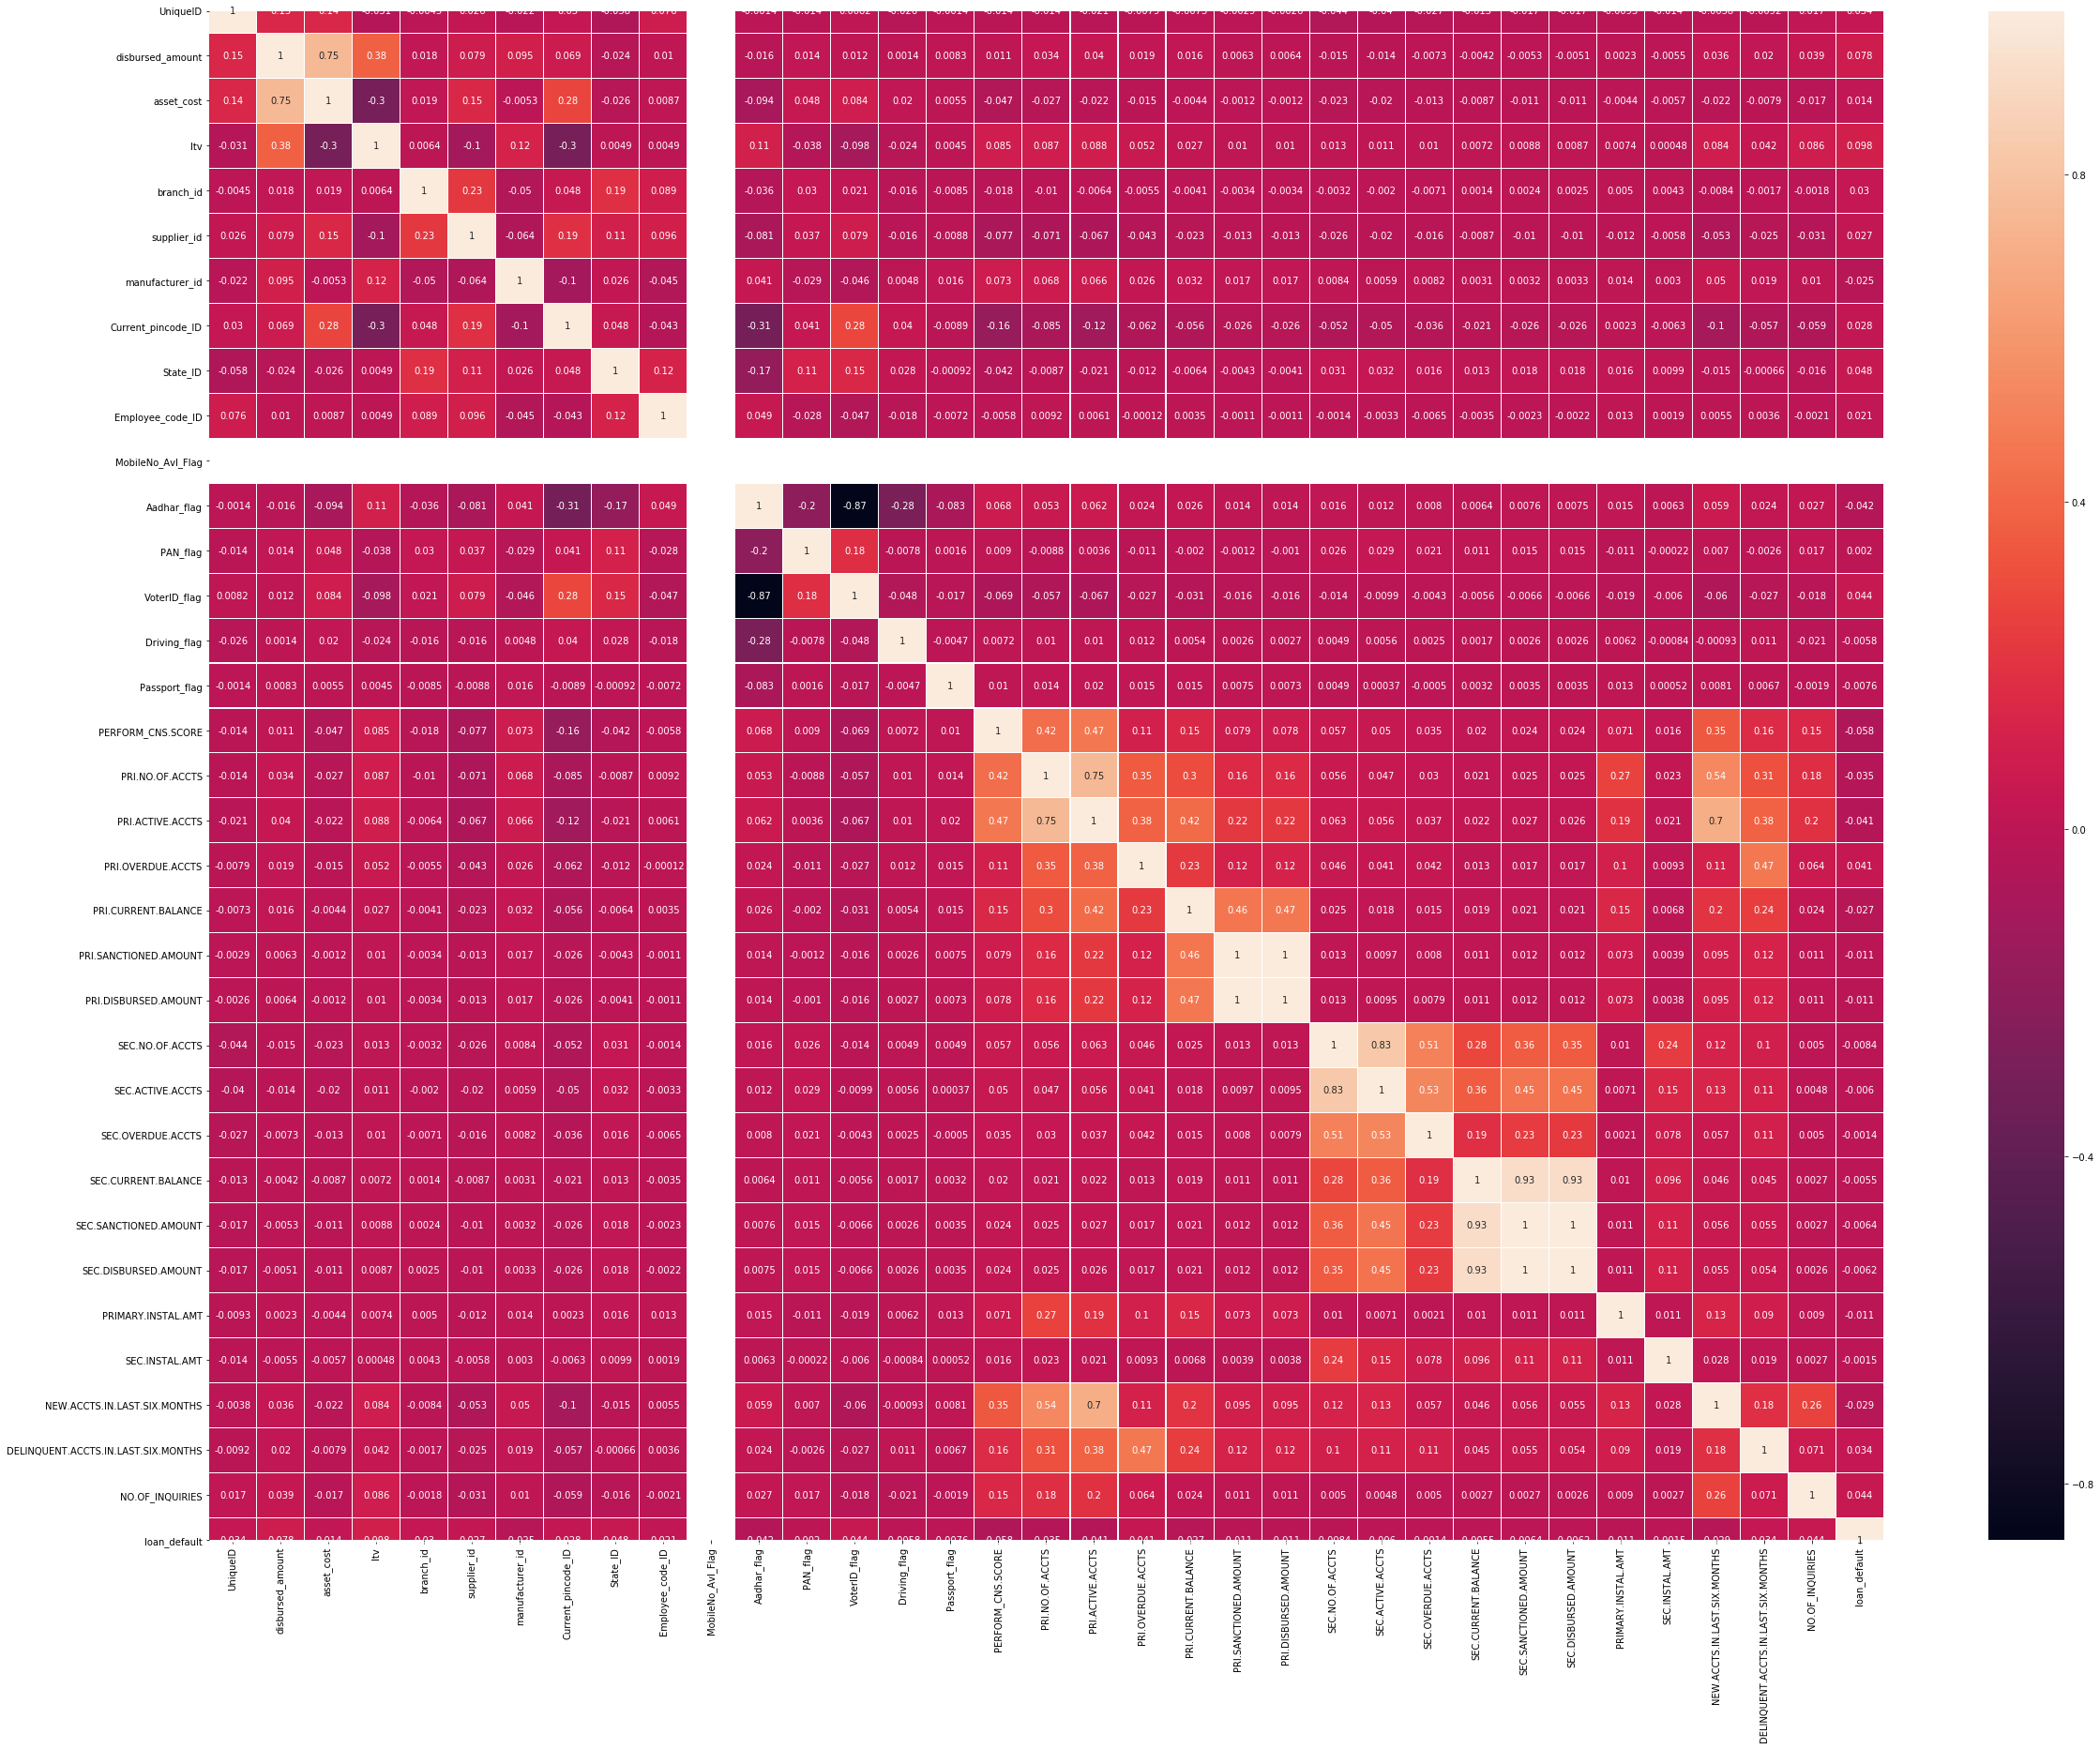

In [13]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),linewidths=0.05,annot=True)
plt.show()

In [14]:
df['disbursed_amount'].corr(df['ltv'])

0.37674709816705

In [15]:
np.corrcoef(df['disbursed_amount'],df['ltv'])

array([[1.       , 0.3767471],
       [0.3767471, 1.       ]])

In [16]:
df.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,NaN,-0.001372,-0.014291,0.008201,-0.026072,-0.001382,-0.014016,-0.013584,-0.020862,-0.007915,-0.007259,-0.002910,-0.002563,-0.044180,-0.039888,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,NaN,-0.015589,0.014490,0.011665,0.001381,0.008291,0.011409,0.034461,0.039542,0.019422,0.015713,0.006294,0.006412,-0.014916,-0.014275,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,NaN,-0.093716,0.048075,0.083899,0.020484,0.005542,-0.047398,-0.026798,-0.021692,-0.014782,-0.004356,-0.001180,-0.001221,-0.022600,-0.020359,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,NaN,0.106953,-0.037786,-0.098393,-0.024060,0.004467,0.084993,0.086571,0.087929,0.051770,0.026714,0.009955,0.010177,0.013019,0.010565,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,NaN,-0.036384,0.030206,0.021387,-0.015503,-0.008537,-0.018049,-0.010384,-0.006403,-0.005546,-0.004133,-0.003370,-0.003412,-0.003194,-0.001957,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,NaN,-0.081161,0.036804,0.079355,-0.015682,-0.008773,-0.077029,-0.070536,-0.066930,-0.042692,-0.022582,-0.012959,-0.012950,-0.025809,-0.019885,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,NaN,0.041251,-0.029272,-0.046489,0.004777,0.016338,0.073012,0.068371,0.065589,0.025992,0.031722,0.017242,0.017080,0.008392,0.005898,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,NaN,-0.309285,0.041118,0.281934,0.039667,-0.008913,-0.161664,-0.084687,-0.117882,-0.062177,-0.055948,-0.025843,-0.025697,-0.051766,-0.049852,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,NaN,-0.169882,0.113939,0.151839,0.027886,-0.000915,-0.042323,-0.008704,-0.021061,-0.012381,-0.006359,-0.004304,-0.004129,0.031245,0.032142,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,NaN,0.048759,-0.027579,-0.047342,-0.017617,-0.007205,-0.005767,0.009197,0.006111,-0.000116,0.003528,-0.001105,-0.001088,-0.001385,-0.003331,-0.006537,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657


In [17]:
df.drop(['MobileNo_Avl_Flag','UniqueID'],axis=1,inplace=True)

In [18]:
df1=df[df['loan_default']==1]
df0=df[df['loan_default']==0]

### disbursed_amount

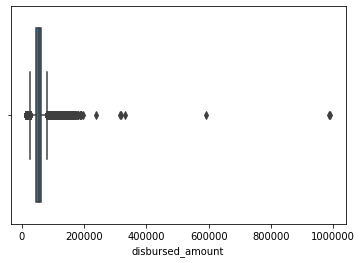

In [19]:
sns.boxplot(df['disbursed_amount'])

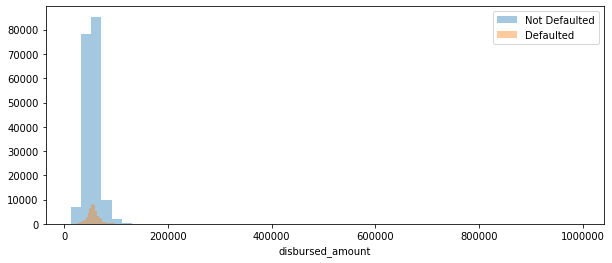

In [20]:
plt.figure(figsize=(10,4))
sns.distplot(df0['disbursed_amount'],kde=False)
sns.distplot(df1['disbursed_amount'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

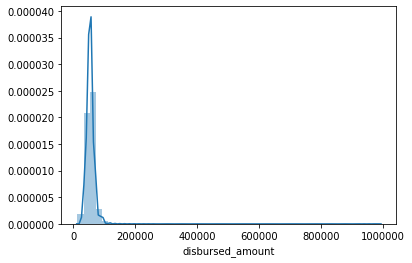

In [21]:
sns.distplot(df['disbursed_amount'])

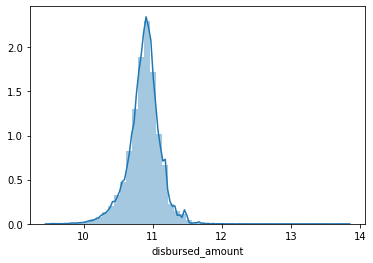

In [22]:
sns.distplot(df['disbursed_amount'].apply(lambda x:np.log(x)))

In [23]:
df['disbursed_amount']=df['disbursed_amount'].apply(lambda x:np.log(x))

In [24]:
#ie=df[df['disbursed_amount']>190_000].index
#print(ie)

In [25]:
# df.loc[ie,'disbursed_amount']=np.nan

In [26]:
'''from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)'''

'from sklearn.impute import KNNImputer\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nimp = IterativeImputer(max_iter=10, random_state=0)'

In [27]:
# pd.DataFrame(imp.fit_transform(df))

### asset_cost

In [28]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,10.831272,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,10.760983,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,10.883279,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,10.959766,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,10.866242,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,105405,60.72,34,20700,48,1050,01-08-88,Salaried,26-10-18,6,3705,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,11.207093,100600,74.95,34,23775,51,990,05-12-88,Self employed,23-10-18,6,3705,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,10.418823,71212,48.45,77,22186,86,2299,01-06-76,Salaried,24-10-18,4,3479,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,10.441705,73286,49.10,77,22186,86,2299,26-03-94,Salaried,29-09-18,4,3479,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


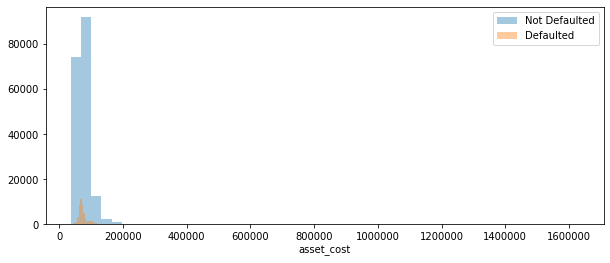

In [29]:
plt.figure(figsize=(10,4))
sns.distplot(df0['asset_cost'],kde=False)
sns.distplot(df1['asset_cost'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

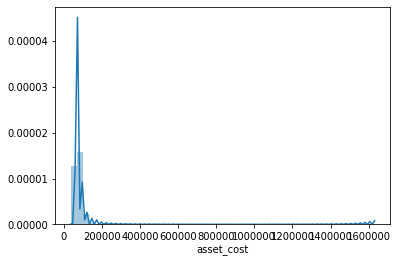

In [30]:
sns.distplot(df['asset_cost'])

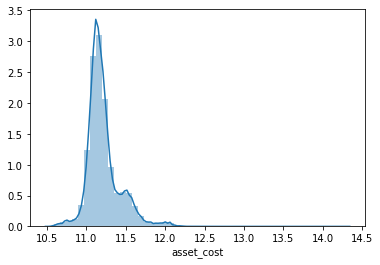

In [31]:
sns.distplot(df['asset_cost'].apply(lambda x:np.log(x)))

In [32]:
df['asset_cost']=df['asset_cost'].apply(lambda x:np.log(x))

### ltv

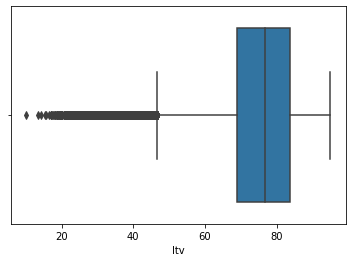

In [32]:
 sns.boxplot(df['ltv'])

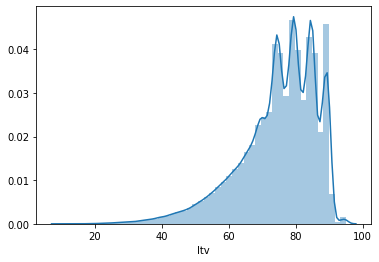

In [33]:
sns.distplot(df['ltv'])

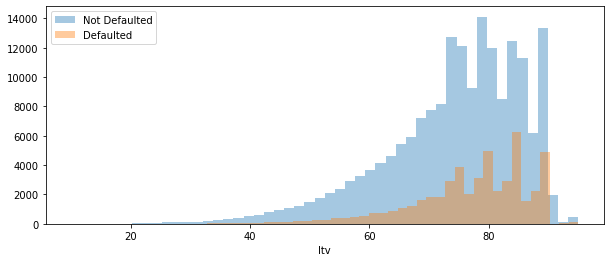

In [34]:
plt.figure(figsize=(10,4))
sns.distplot(df0['ltv'],kde=False)
sns.distplot(df1['ltv'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

### supplier_id

In [35]:
df['supplier_id'].value_counts()

18317    1432
15694    1300
15663    1275
17980    1268
14234    1258
         ... 
22811       1
23189       1
23712       1
15045       1
18019       1
Name: supplier_id, Length: 2953, dtype: int64

In [36]:
supplier_loan=pd.crosstab(df['supplier_id'],df['loan_default'])

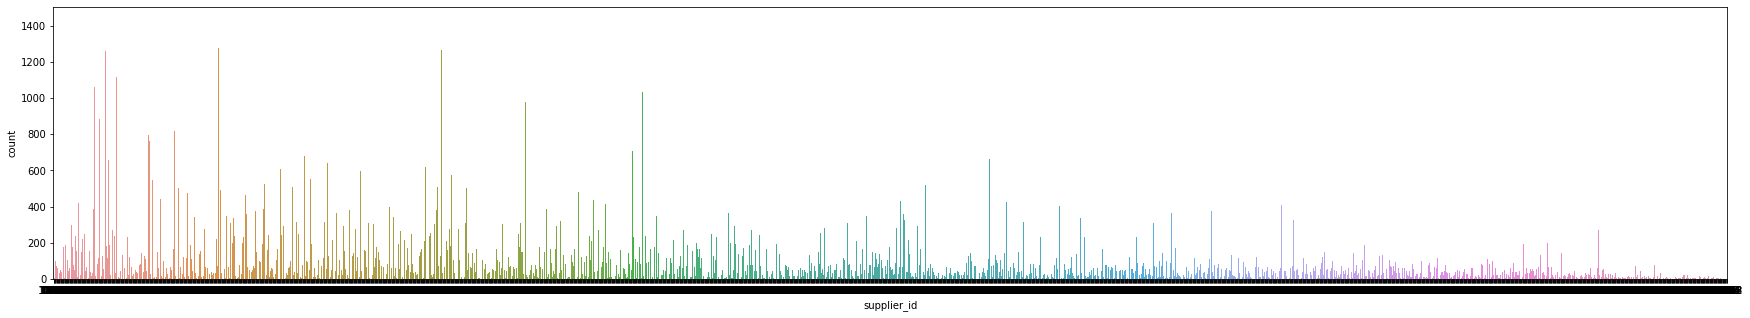

In [37]:
plt.figure(figsize=(30,5))
sns.countplot(df['supplier_id'])

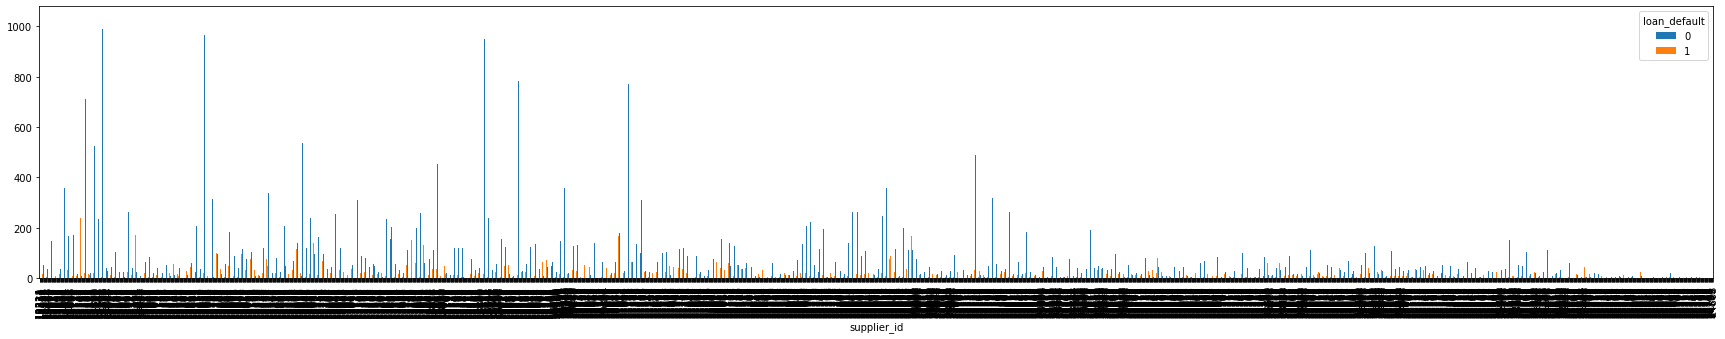

In [38]:
pd.crosstab(df['supplier_id'],df['loan_default']).plot(kind='bar',figsize=(30,5))

In [39]:
import  scipy.stats                     as  stats

In [40]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(supplier_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)
p_value

Chi Square Statistics 9339.709281561767
p-value 0.0
Degree of freedom 2952


0.0

### branch_id

In [41]:
df['branch_id'].value_counts()

2      13138
67     11328
3       9230
5       9218
36      8832
136     7833
34      7794
16      6466
19      5860
1       5709
146     5376
18      5032
152     4933
61      4906
48      4725
11      4506
20      4431
138     4352
74      4297
120     4210
147     4160
10      4125
103     3878
251     3844
65      3509
160     3505
79      3413
7       3222
135     3203
8       3146
15      2975
13      2972
162     2758
159     2725
42      2714
9       2528
105     2464
68      2314
78      2182
202     1999
63      1954
85      1876
248     1837
70      1757
254     1699
104     1651
255     1650
64      1646
14      1558
29      1545
250     1481
73      1454
77      1445
72      1294
257     1256
17      1160
130     1069
82      1035
165     1021
121      884
249      858
76       855
69       810
35       693
153      692
62       691
207      689
43       584
117      558
142      473
97       389
258      374
260      372
101      368
259      346
100      331
66       314

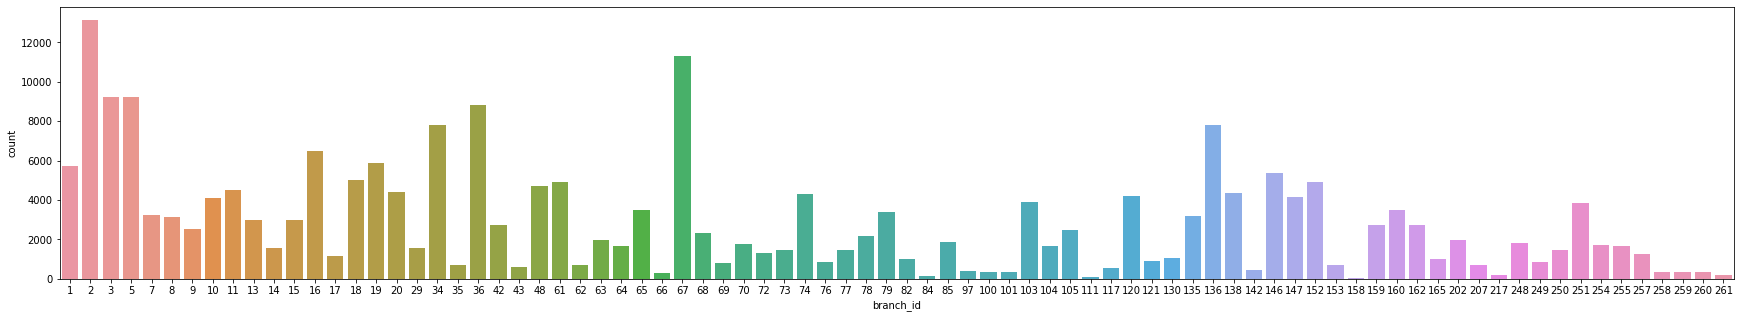

In [42]:
plt.figure(figsize=(30,5))
sns.countplot(df['branch_id'])
plt.show()

In [43]:
pd.crosstab(df['branch_id'],df['loan_default'])

loan_default,0,1
branch_id,,
1,4856,853
2,10683,2455
3,7616,1614
5,7171,2047
7,2566,656
8,2715,431
9,2043,485
10,2983,1142
11,3564,942


In [44]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(supplier_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 9339.709281561767
p-value 0.0
Degree of freedom 2952


### manufacture_id

In [45]:
df['manufacturer_id'].value_counts()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: manufacturer_id, dtype: int64

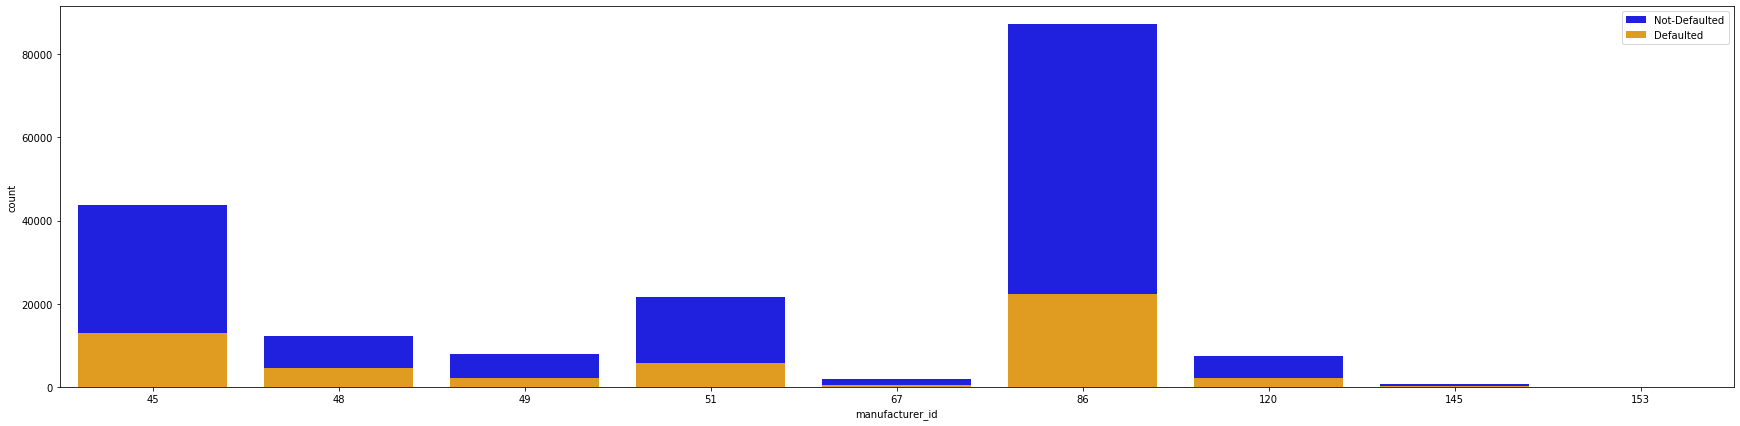

In [46]:
plt.figure(figsize=(30,7))
sns.countplot(df0['manufacturer_id'],color='blue')
sns.countplot(df1['manufacturer_id'],color='orange')
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

In [47]:
manu_loan=pd.crosstab(df['manufacturer_id'],df['loan_default'])
print(manu_loan)

loan_default         0      1
manufacturer_id              
45               43687  12939
48               12156   4554
49                7984   2236
51               21547   5657
67                1882    523
86               87124  22410
120               7526   2132
145                622    156
152                  6      0
153                  8      4
156                  1      0


In [48]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(manu_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 464.69764016358414
p-value 1.5277380091688753e-93
Degree of freedom 10


### age of disbursal
Changed to **Age**

In [35]:
pres_date='01-01-20' # Present date

def days_between(d1,d2):
    d1=datetime.strptime(d1,'%d-%m-%y')
    d2=datetime.strptime(d2,'%d-%m-%y')
    return abs((d2-d1).days)

In [36]:
df['Date.of.Birth']=df['Date.of.Birth'].apply(lambda x:days_between(x,pres_date)/365) # converting date of birth in years
df['DisbursalDate']=df['DisbursalDate'].apply(lambda x:days_between(x,pres_date)/365) # converting disbursed date to the present date

In [53]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age_at_disbursal
0,10.831272,10.975071,89.55,67,22807,45,1441,1984,Salaried,2018,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,10.760983,11.090568,73.23,67,22807,45,1502,1985,Self employed,2018,6,1998,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33
2,10.883279,11.024513,89.63,67,22807,45,1497,1985,Self employed,2018,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33
3,10.959766,11.099121,88.48,67,22807,45,1501,1993,Self employed,2018,6,1998,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,25
4,10.866242,11.007087,88.39,67,22807,45,1495,1977,Self employed,2018,6,1998,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41


In [40]:
df[df['loan_default']==0]['DisbursalDate']

0         1.413699
2         1.419178
5         1.284932
6         1.273973
7         1.293151
            ...   
233149    1.183562
233150    1.191781
233151    1.189041
233152    1.257534
233153    1.180822
Name: DisbursalDate, Length: 182543, dtype: float64

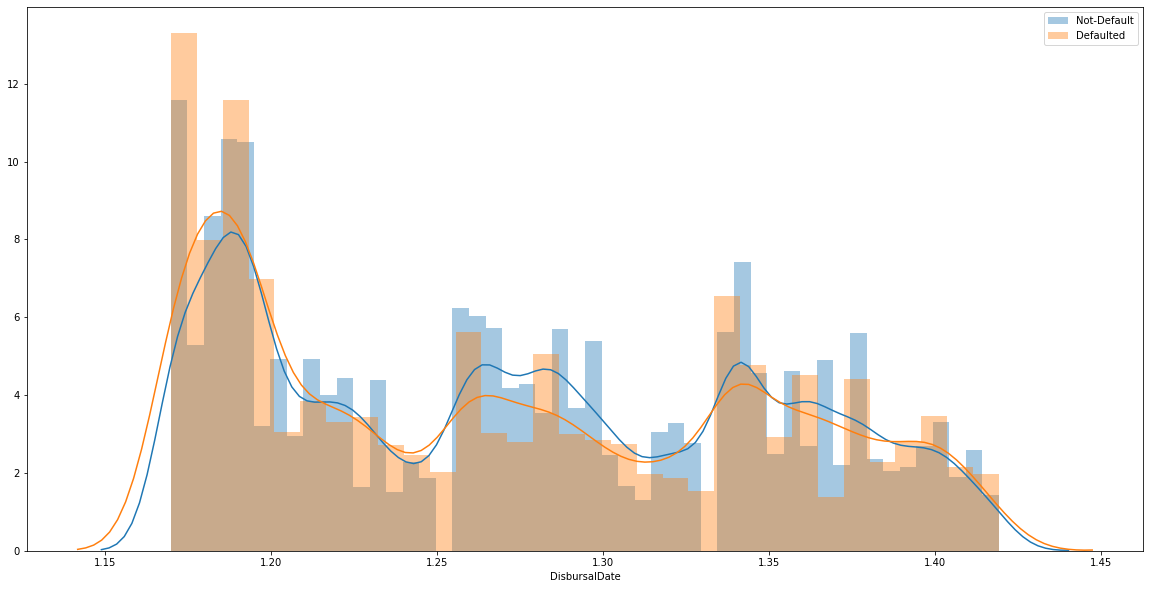

In [43]:
plt.figure(figsize=(20,10))
sns.distplot(df[df['loan_default']==0]['DisbursalDate'])
sns.distplot(df[df['loan_default']==1]['DisbursalDate'])
plt.legend(labels=['Not-Default','Defaulted'])

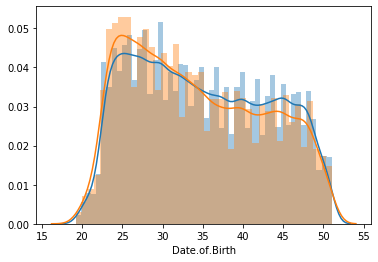

In [42]:
sns.distplot(df[df['loan_default']==0]['Date.of.Birth'])
sns.distplot(df[df['loan_default']==1]['Date.of.Birth'])

### Employment Type

In [44]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [47]:
df['Employment.Type']=df['Employment.Type'].fillna('unknown')

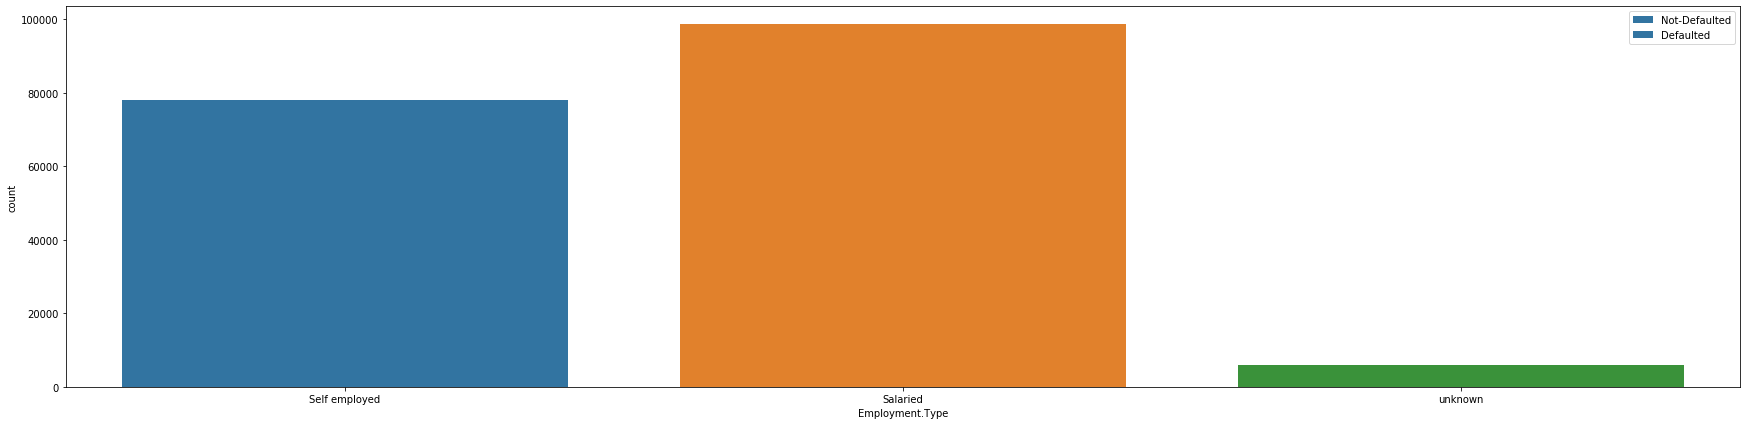

In [48]:
plt.figure(figsize=(30,7))
sns.countplot(df0['Employment.Type'])
sns.countplot(df1['Employment.Type'])
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

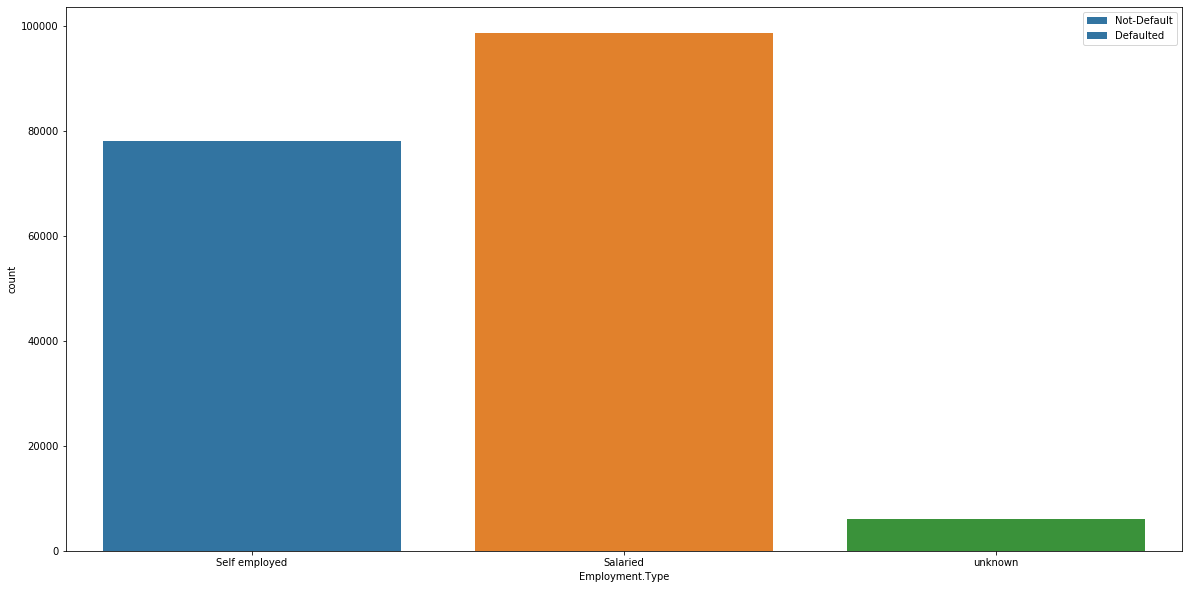

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(df[df['loan_default']==0]['Employment.Type'])
sns.countplot(df[df['loan_default']==1]['Employment.Type'])
plt.legend(labels=['Not-Default','Defaulted'])

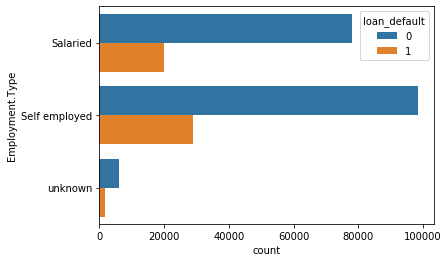

In [54]:
sns.countplot(y='Employment.Type',data=df,hue='loan_default')

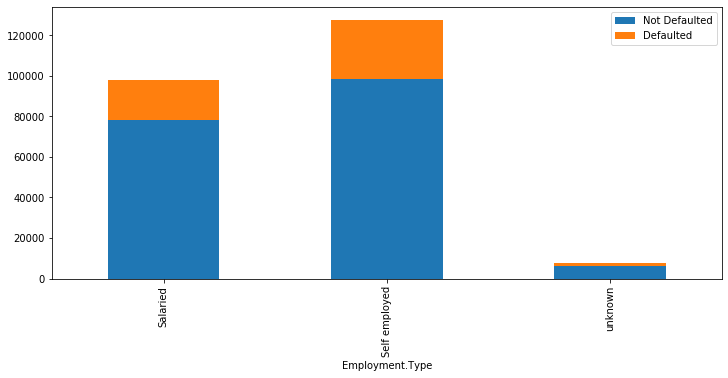

In [50]:
ct=pd.crosstab(df['Employment.Type'], df['loan_default'])
ct.plot.bar(stacked=True,figsize=(12,5))
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

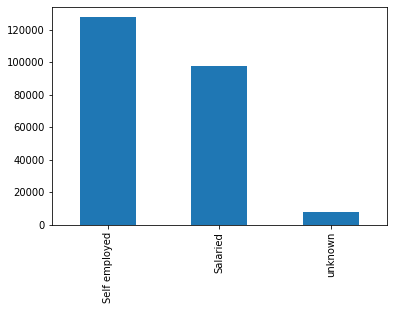

In [62]:
df['Employment.Type'].value_counts().plot(kind='bar')

In [63]:
df['Employment.Type'].value_counts(normalize=True)

Self employed    0.547428
Salaried         0.419714
unknown          0.032858
Name: Employment.Type, dtype: float64

In [64]:
emp_loan=pd.crosstab(df['Employment.Type'],df['loan_default'])
print(emp_loan)

loan_default         0      1
Employment.Type              
Salaried         77948  19910
Self employed    98578  29057
unknown           6017   1644


In [65]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(emp_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 191.1398528340361
p-value 3.1225422343284505e-42
Degree of freedom 2


## State ID

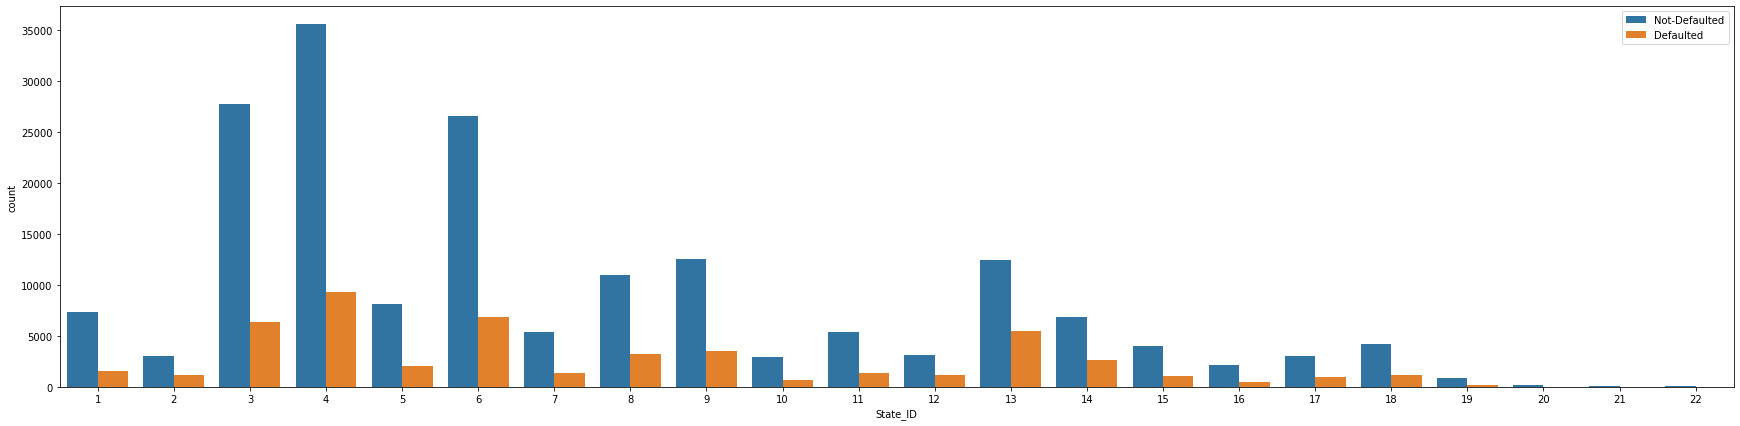

In [56]:
plt.figure(figsize=(30,7))
sns.countplot(x='State_ID',hue='loan_default',data=df)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

## Employee ID

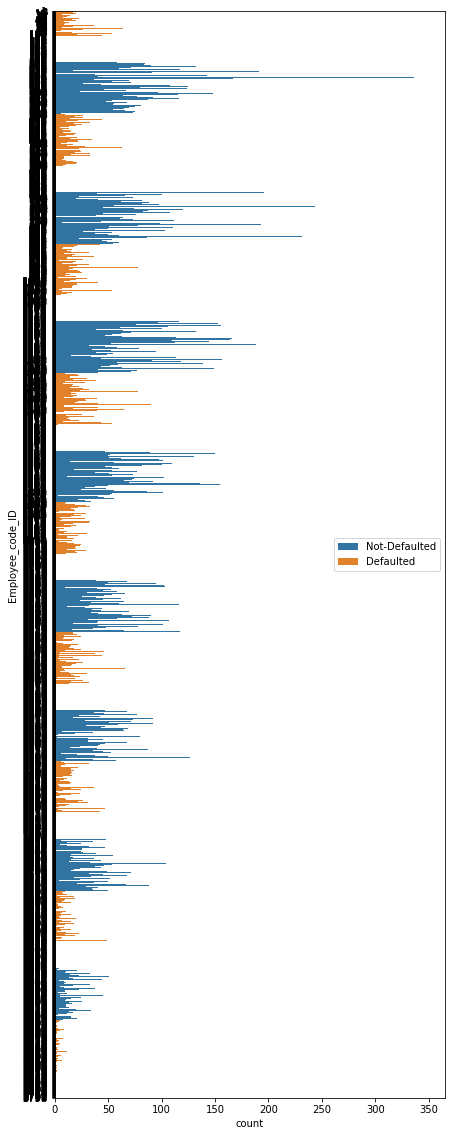

In [58]:
plt.figure(figsize=(7,20))
sns.countplot(y='Employee_code_ID',hue='loan_default',data=df)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

### State_ID: Passport_flag

In [59]:
df.loc[:,'Aadhar_flag':'Passport_flag']

,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
233149,0,0,1,0,0
233150,0,0,1,0,0
233151,1,0,0,0,0
233152,1,0,0,0,0


In [60]:
temp=df.loc[:,'Aadhar_flag':'Passport_flag'].columns
print(temp)

Index(['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag'], dtype='object')


In [68]:
df['Aadhar_flag']+df['PAN_flag']+df['VoterID_flag']+df['Driving_flag']+df['Passport_flag']

0         1
1         1
2         1
3         1
4         1
         ..
233149    1
233150    1
233151    1
233152    1
233153    1
Length: 233154, dtype: int64

In [70]:
def flags(df):
    return sum(df[['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']])

In [71]:
flags(df)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

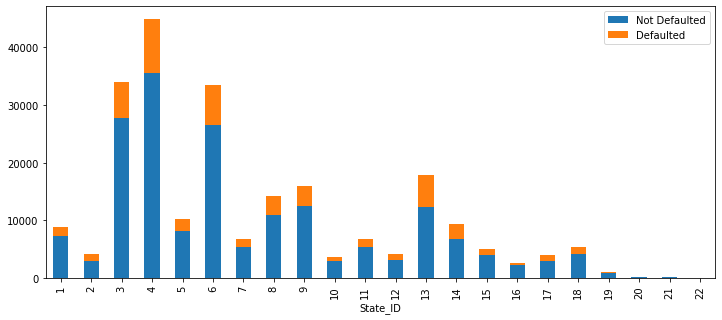

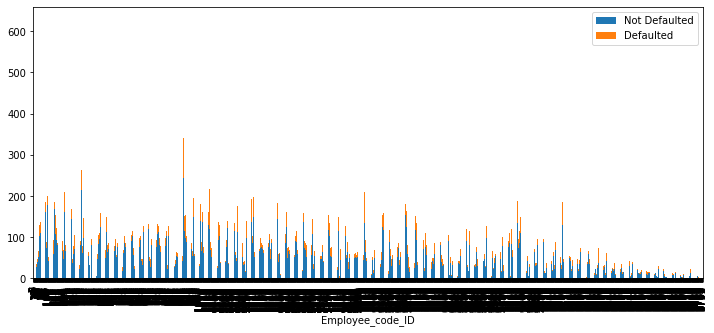

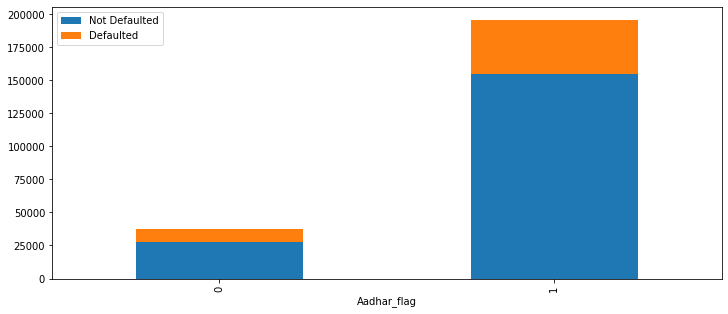

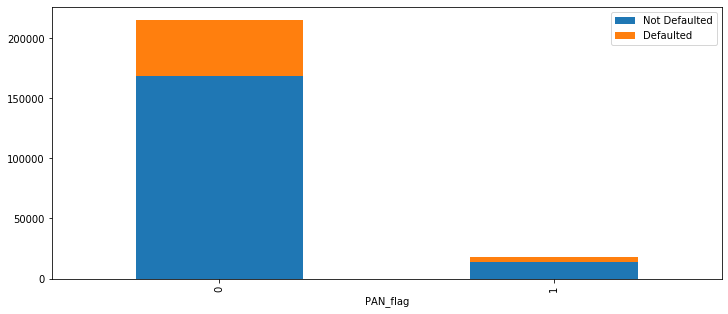

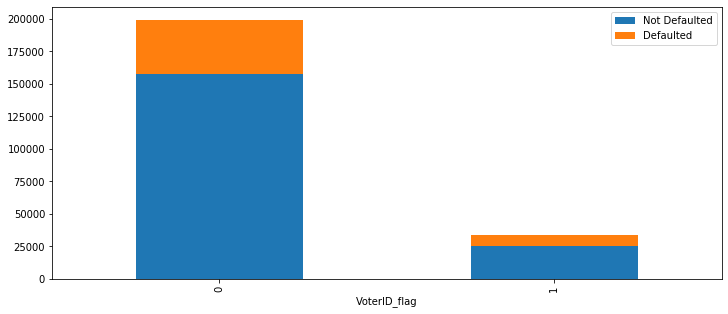

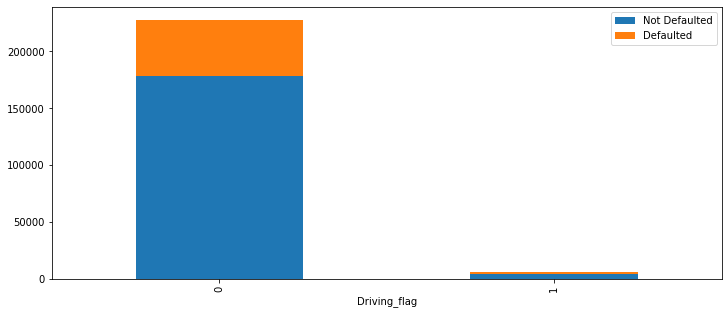

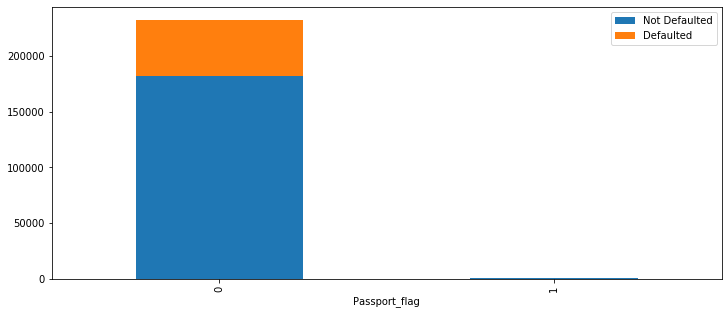

In [71]:
for i in ['State_ID', 'Employee_code_ID','Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']:
    ct=pd.crosstab(df[i], df['loan_default'])
    ct.plot.bar(stacked=True,figsize=(12,5))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()

In [72]:
for i in temp:
    print('Feature:',i)
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],df['loan_default']))
    print('Chi Square Statistics',chi_sq)
    print('p-value',p_value)
    print('Degree of freedom',deg_freedom)
    print()

Feature: State_ID
Chi Square Statistics 1626.8617814468685
p-value 0.0
Degree of freedom 21

Feature: Employee_code_ID
Chi Square Statistics 10531.308446989955
p-value 0.0
Degree of freedom 3269

Feature: Aadhar_flag
Chi Square Statistics 403.0748379341479
p-value 1.1791998402218374e-89
Degree of freedom 1

Feature: PAN_flag
Chi Square Statistics 0.957671117865875
p-value 0.3277743362589148
Degree of freedom 1

Feature: VoterID_flag
Chi Square Statistics 445.90884255981064
p-value 5.603683381655361e-99
Degree of freedom 1

Feature: Driving_flag
Chi Square Statistics 7.808087835127649
p-value 0.0052012912081583085
Degree of freedom 1

Feature: Passport_flag
Chi Square Statistics 13.077913022819462
p-value 0.0002987981770071958
Degree of freedom 1



In [73]:
df=df.drop(['PAN_flag'],axis=1)

### 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION'

In [265]:

df[['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']]

,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION
0,0,No Bureau History Available
1,598,I-Medium Risk
2,0,No Bureau History Available
3,305,L-Very High Risk
4,0,No Bureau History Available
...,...,...
233149,735,D-Very Low Risk
233150,825,A-Very Low Risk
233151,0,No Bureau History Available
233152,0,No Bureau History Available


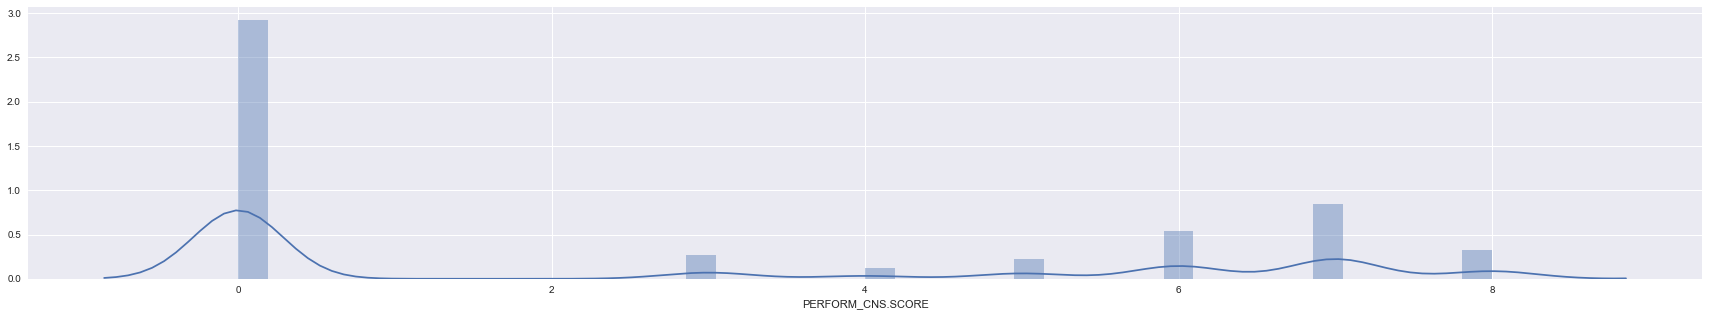

In [276]:
plt.figure(figsize=(30,5))
sns.distplot(df['PERFORM_CNS.SCORE'])
plt.show()

In [267]:
def cns_score(score):
    if score<100:
        return 0
    elif (score>=100) & (score<200):
        return 1
    elif (score>=200) & (score<300):
        return 2
    elif (score>=300) & (score<400):
        return 3
    elif (score>=400) & (score<500):
        return 4
    elif (score>=500) & (score<600):
        return 5
    elif (score>=600) & (score <700):
        return 6
    elif (score>=700) & (score <800):
        return 7
    elif (score>=800) & (score <900):
        return 8
    elif (score>=900) & (score <1000):
        return 9
    else:
        return 10

In [268]:
cns_score(1004)

10

In [269]:
df['PERFORM_CNS.SCORE'].map(lambda x:cns_score(x)).value_counts()

0    129785
7     37420
6     24215
8     14405
3     11705
5     10175
4      5449
Name: PERFORM_CNS.SCORE, dtype: int64

In [270]:
df['PERFORM_CNS.SCORE']=df['PERFORM_CNS.SCORE'].map(lambda x:cns_score(x))

In [271]:
df[ 'PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [82]:
df['PERFORM_CNS.SCORE.DESCRIPTION']=le.fit_transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])

In [83]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

13    116950
2      16045
0      14124
3      11358
1       9201
12      8776
5       8485
10      8277
7       6855
4       5821
8       5557
6       3988
19      3765
9       3748
17      3672
15      2885
16      1534
11      1134
18       976
14         3
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

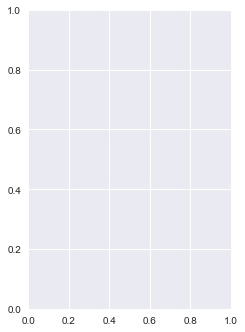

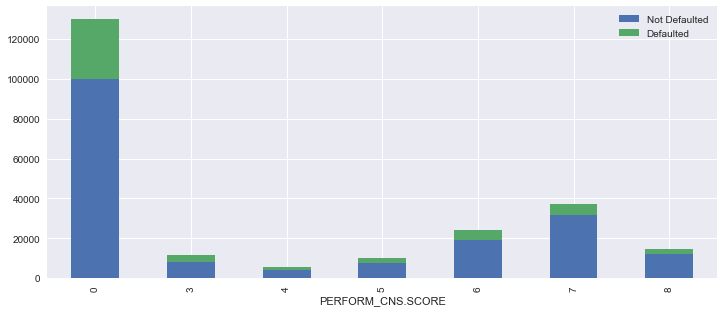

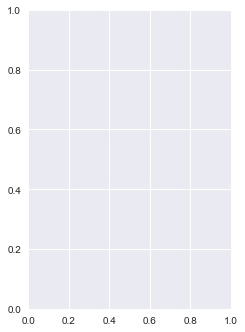

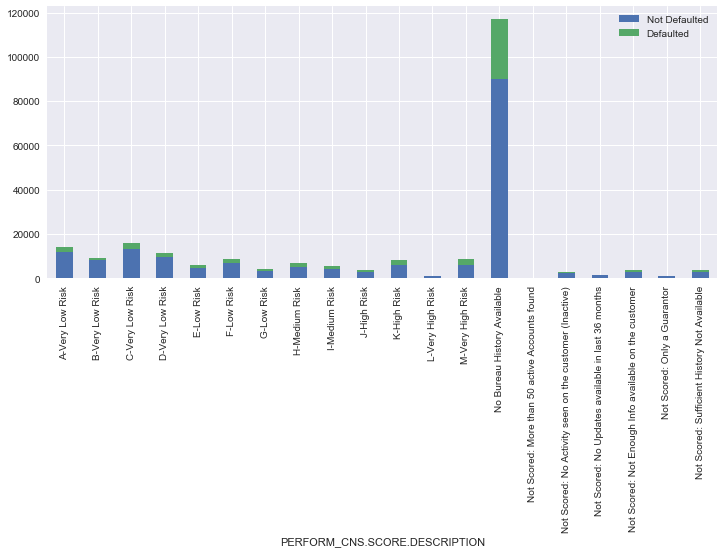

In [274]:
for i in ['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']:
    plt.subplot(1,2,count)
    ct=pd.crosstab(df[i], df['loan_default'])
    ct.plot.bar(stacked=True,figsize=(12,5))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()

In [84]:
for i in ['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']:
    print('Feature:',i)
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],df['loan_default']))
    print('Chi Square Statistics',chi_sq)
    print('p-value',p_value)
    print('Degree of freedom',deg_freedom)
    print()

Feature: PERFORM_CNS.SCORE
Chi Square Statistics 1972.6002060532476
p-value 0.0
Degree of freedom 6

Feature: PERFORM_CNS.SCORE.DESCRIPTION
Chi Square Statistics 2192.3575555074094
p-value 0.0
Degree of freedom 19



### 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT'

In [85]:
df.loc[:,[ 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']]

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT
0,0,0,0,0,0,0
1,1,1,1,27600,50200,50200
2,0,0,0,0,0,0
3,3,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
233149,4,3,0,390443,416133,416133
233150,1,0,0,0,0,0
233151,0,0,0,0,0,0
233152,0,0,0,0,0,0


In [86]:
primary=df.loc[:,[ 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']]

In [87]:
primary.describe()

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT
count,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05
mean,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05
std,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06
min,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04
max,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09


In [88]:
primary['PRI.NO.OF.ACCTS'].value_counts()

0      116950
1       34978
2       19784
3       13015
4        9323
5        7222
6        5557
7        4411
8        3570
9        2884
10       2358
11       1919
12       1567
13       1401
14       1132
15        941
16        798
17        652
18        573
19        503
20        436
21        347
22        323
24        286
23        250
25        187
26        170
27        153
28        141
29        130
30        124
31        111
32         83
35         73
34         70
33         67
37         53
38         53
36         49
40         41
39         34
43         32
41         31
42         25
45         24
47         23
46         20
51         17
44         17
50         16
49         14
48         14
54         12
53         11
60         10
56         10
57          9
52          9
59          9
63          7
61          7
55          7
58          7
68          6
72          6
62          5
64          5
65          5
78          5
71          4
74          4
67    

In [89]:
pri_col=['PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']

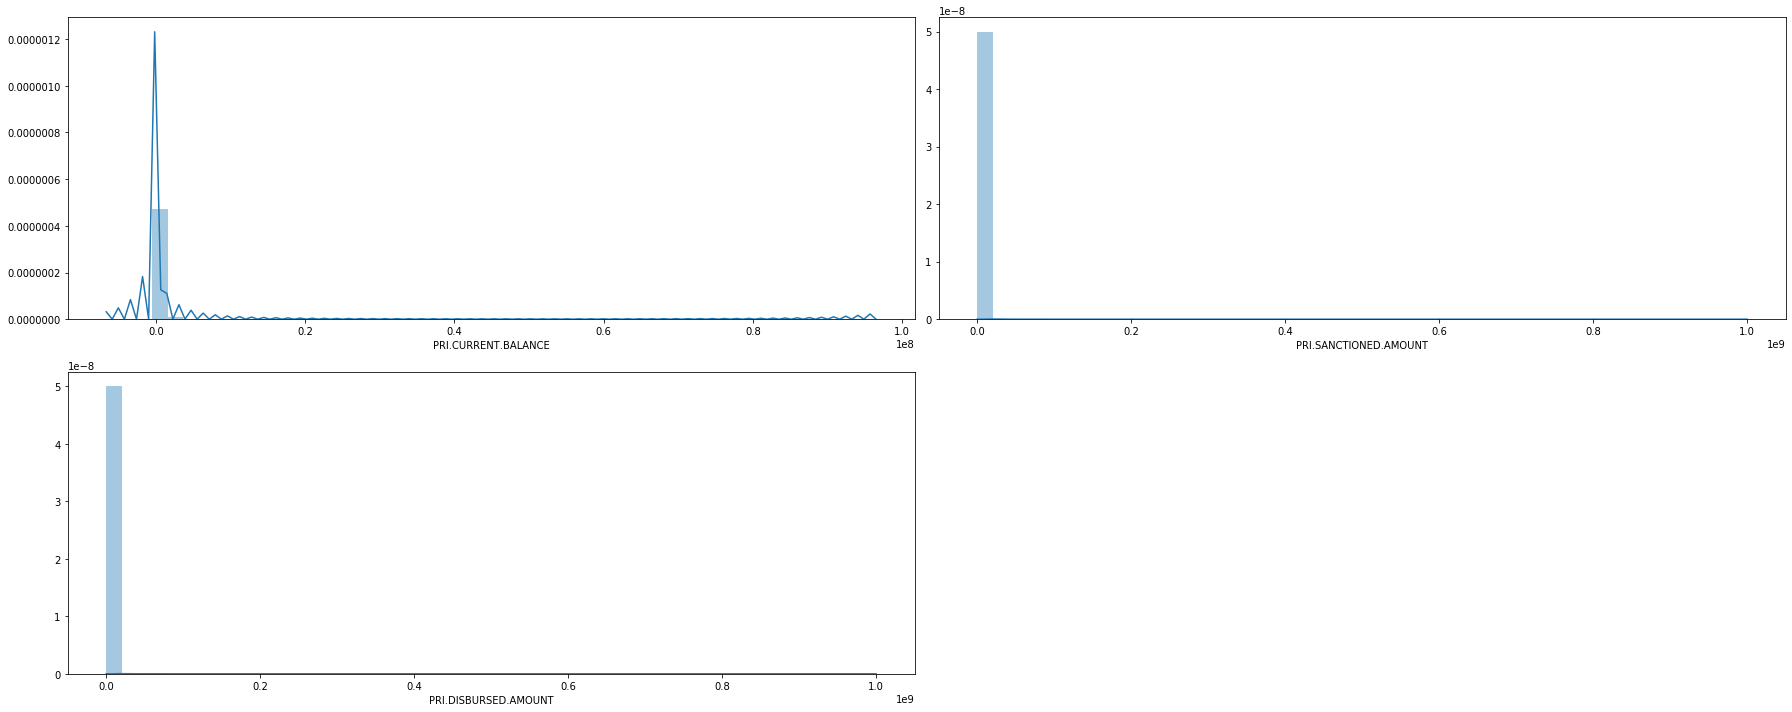

In [90]:
count=1
plt.figure(figsize=(25,10))
for i in pri_col:
    plt.subplot(2,2,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout()

In [91]:
df.loc[:,pri_col].corr()

,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT
PRI.CURRENT.BALANCE,1.000000,0.464729,0.470284
PRI.SANCTIONED.AMOUNT,0.464729,1.000000,0.998747
PRI.DISBURSED.AMOUNT,0.470284,0.998747,1.000000


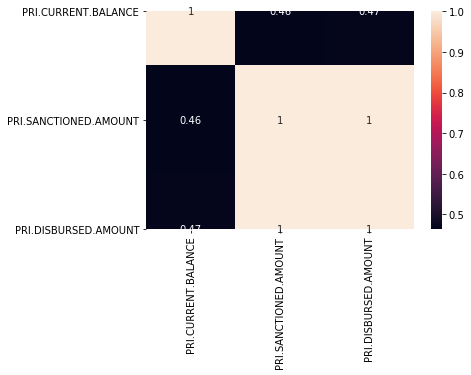

In [92]:
sns.heatmap(df.loc[:,pri_col].corr(),annot=True)

In [93]:
#sns.distplot(df['disbursed_amount'].apply(lambda x:np.log1p(x)))

In [94]:
np.log(0+1)

0.0

### 'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT'

In [95]:
df[['SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]

,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
233149,0,0,0,0,0,0
233150,0,0,0,0,0,0
233151,0,0,0,0,0,0
233152,0,0,0,0,0,0


In [96]:
secondary=df[['SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]

In [97]:
secondary['SEC.NO.OF.ACCTS'].value_counts()

0     227289
1       3466
2       1036
3        444
4        292
5        148
6        119
7         75
8         68
9         38
10        35
11        29
13        17
12        13
16        11
14        11
15        10
18         6
19         6
17         5
20         4
22         4
23         4
31         4
21         3
46         2
24         2
38         2
30         2
34         2
37         1
42         1
28         1
35         1
29         1
25         1
52         1
Name: SEC.NO.OF.ACCTS, dtype: int64

In [98]:
secondary.describe()

,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT
count,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05
mean,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03
std,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05
min,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07


### PRIMARY.INSTAL.AMT

In [99]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID', 'Employee_code_ID', 'Aadhar_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default', 'age_at_disbursal'], dtype='object')

In [100]:
df['PRIMARY.INSTAL.AMT']

0            0
1         1991
2            0
3           31
4            0
          ... 
233149    4084
233150    1565
233151       0
233152       0
233153       0
Name: PRIMARY.INSTAL.AMT, Length: 233154, dtype: int64

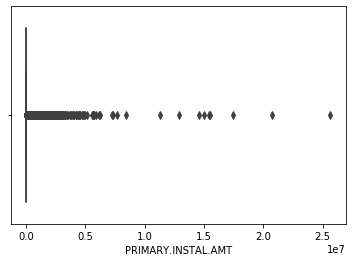

In [101]:
sns.boxplot(df['PRIMARY.INSTAL.AMT'])

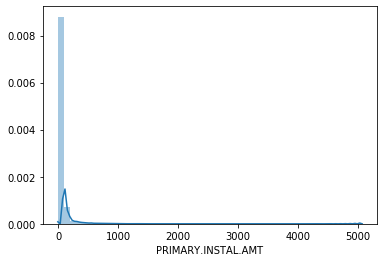

In [102]:
sns.distplot(df['PRIMARY.INSTAL.AMT'].apply(lambda x:np.sqrt(x)))

In [103]:
df['PRIMARY.INSTAL.AMT']=df['PRIMARY.INSTAL.AMT'].apply(lambda x:np.sqrt(x))

### SEC.INSTAL.AMT

In [104]:
df['SEC.INSTAL.AMT']

0         0
1         0
2         0
3         0
4         0
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: SEC.INSTAL.AMT, Length: 233154, dtype: int64

In [105]:
df['SEC.INSTAL.AMT'].value_counts()

0         230937
2100           7
1100           6
5000           6
1065           6
           ...  
1744           1
6098           1
2256           1
108900         1
16695          1
Name: SEC.INSTAL.AMT, Length: 1918, dtype: int64

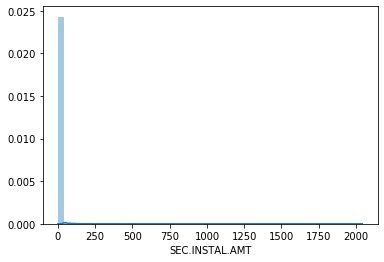

In [106]:
sns.distplot(df['SEC.INSTAL.AMT'].apply(lambda x:np.sqrt(x)))

In [107]:
df['SEC.INSTAL.AMT']=df['SEC.INSTAL.AMT'].apply(lambda x:np.sqrt(x))

### NEW.ACCTS.IN.LAST.SIX.MONTHS

In [108]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS']

0         0
1         0
2         0
3         0
4         0
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, Length: 233154, dtype: int64

In [109]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
28         1
21         1
22         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

### DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [110]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
28         1
21         1
22         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

### DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [111]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

0         0
1         1
2         0
3         0
4         0
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, Length: 233154, dtype: int64

In [112]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     214959
1      14941
2       2470
3        537
4        138
5         58
6         20
7         13
8          7
12         3
11         3
10         2
9          2
20         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

### AVERAGE.ACCT.AGE

In [113]:
df['AVERAGE.ACCT.AGE']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          0yrs 8mon
4          0yrs 0mon
             ...    
233149     1yrs 9mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: AVERAGE.ACCT.AGE, Length: 233154, dtype: object

In [114]:
df['AVERAGE.ACCT.AGE']=df['AVERAGE.ACCT.AGE'].apply(lambda x:(re.sub('[a-z]','',x)).split())
df['AVERAGE.ACCT.AGE']=df['AVERAGE.ACCT.AGE'].apply(lambda x:int(x[0])*12+int(x[1]))

### CREDIT.HISTORY.LENGTH

In [115]:
df['CREDIT.HISTORY.LENGTH']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          1yrs 3mon
4          0yrs 0mon
             ...    
233149     3yrs 3mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: object

In [116]:
df['CREDIT.HISTORY.LENGTH']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x:
                                                                   (re.sub('[a-z]','',x)).split())
df['CREDIT.HISTORY.LENGTH']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x:
                                                                   int(x[0])*12+int(x[1]))

In [117]:
df['CREDIT.HISTORY.LENGTH']

0          0
1         23
2          0
3         15
4          0
          ..
233149    39
233150     6
233151     0
233152     0
233153     0
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: int64

### NO.OF_INQUIRIES

In [118]:
df['NO.OF_INQUIRIES'].value_counts()

0     201961
1      22285
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
13         6
19         6
17         4
18         4
16         3
28         1
20         1
22         1
23         1
36         1
Name: NO.OF_INQUIRIES, dtype: int64

In [119]:
df['NO.OF_INQUIRIES'].describe()

count    233154.000000
mean          0.206615
std           0.706498
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: NO.OF_INQUIRIES, dtype: float64

### loan_default (Target/Dependent Variable)

0    182543
1     50611
Name: loan_default, dtype: int64


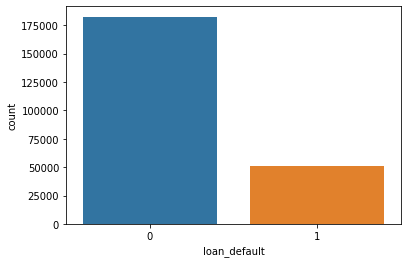

In [120]:
print(df['loan_default'].value_counts())
sns.countplot(df['loan_default'])
plt.show()

In [121]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,Aadhar_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age_at_disbursal
0,10.831272,10.975071,89.55,67,22807,45,1441,Salaried,6,1998,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,34
1,10.760983,11.090568,73.23,67,22807,45,1502,Self employed,6,1998,1,0,0,0,5,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,44.620623,0.0,0,1,23,23,0,1,33
2,10.883279,11.024513,89.63,67,22807,45,1497,Self employed,6,1998,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,33
3,10.959766,11.099121,88.48,67,22807,45,1501,Self employed,6,1998,1,0,0,0,3,11,3,0,0,0,0,0,0,0,0,0,0,0,5.567764,0.0,0,0,8,15,1,1,25
4,10.866242,11.007087,88.39,67,22807,45,1495,Self employed,6,1998,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,1,1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,11.565565,60.72,34,20700,48,1050,Salaried,6,3705,0,1,0,0,7,3,4,3,0,390443,416133,416133,0,0,0,0,0,0,63.906181,0.0,0,0,21,39,0,0,30
233150,11.207093,11.518908,74.95,34,23775,51,990,Self employed,6,3705,0,1,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,39.560081,0.0,0,0,6,6,0,0,30
233151,10.418823,11.173417,48.45,77,22186,86,2299,Salaried,4,3479,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,42
233152,10.441705,11.202125,49.10,77,22186,86,2299,Salaried,4,3479,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,24


In [122]:
df=df.drop(['supplier_id','branch_id','Current_pincode_ID','State_ID','Employee_code_ID'],axis=1)

In [123]:
df

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,Aadhar_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age_at_disbursal
0,10.831272,10.975071,89.55,45,Salaried,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,34
1,10.760983,11.090568,73.23,45,Self employed,1,0,0,0,5,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,44.620623,0.0,0,1,23,23,0,1,33
2,10.883279,11.024513,89.63,45,Self employed,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,33
3,10.959766,11.099121,88.48,45,Self employed,1,0,0,0,3,11,3,0,0,0,0,0,0,0,0,0,0,0,5.567764,0.0,0,0,8,15,1,1,25
4,10.866242,11.007087,88.39,45,Self employed,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,1,1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,11.565565,60.72,48,Salaried,0,1,0,0,7,3,4,3,0,390443,416133,416133,0,0,0,0,0,0,63.906181,0.0,0,0,21,39,0,0,30
233150,11.207093,11.518908,74.95,51,Self employed,0,1,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,39.560081,0.0,0,0,6,6,0,0,30
233151,10.418823,11.173417,48.45,86,Salaried,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,42
233152,10.441705,11.202125,49.10,86,Salaried,1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,0,24
